# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [178]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [180]:
# Load and read the FDS dataset
df = pd.read_csv('/content/drive/MyDrive/MIT_python_course_project1/foodhub_order.csv')# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [181]:
# Check the number of rows and columns
df.shape


(1898, 9)

#### Observations: The data has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [182]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
All columns have 1898 observations, indicating that there are no null values in it.

order_id (unique id of the order), customer_id (unique id of the customer), food_preparation_time (in minutes), delivery_time (in minutes) are 'integer' data types.

restaurant_name and cuisine_type are 'object' data types, and they should be categorical variables.

cost_of_the_order is the only 'float' data type.

day_of_the_week is 'object' data type also categorical variable, which mentions either it is a weekday (Mon-Friday) or weekend (Sat-Sunday)

rating should have been an 'integer' data type, but it is of an 'object' data type, as for some of the orders, the ratings are not provided. The given ratings are 3, 4, or 5.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [183]:
# Checking missing values
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in the data



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [184]:
# to get the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The minimum time it takes for food to be prepared: 20.0 mins

The average  time it takes for food to be prepared: 27.37 mins (approx)

The maximum time it takes for food to be prepared: 35.0 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [185]:
# the number of orders not rated
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: There are 736 orders that are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Answer: For univariate analysis,

1) For Categorical variables (restaurant_name, cuisine_type, day_of_the_week,rating), we make countplots to observe the distribution

2) For Numerical variables (cost_of_the_order, food_preparation_time, delivery_time), we make histogram and boxplots to observe the distributions

3) In case of order_id and customer_id, since these numerical values does not have a direct physical meaning related to other variables, we will just explore how many unique values are there in those variables.

# **1. Categorical variables**

**Restaurant Names**

In [186]:
# Check the unique Restaurant Names
df['restaurant_name'].nunique()


178

In [187]:
#print(df['restaurant_name'].unique())  #print the name of unique restuarnts
# Get the counts or number of orders for each restuarant
print(df['restaurant_name'].value_counts())

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


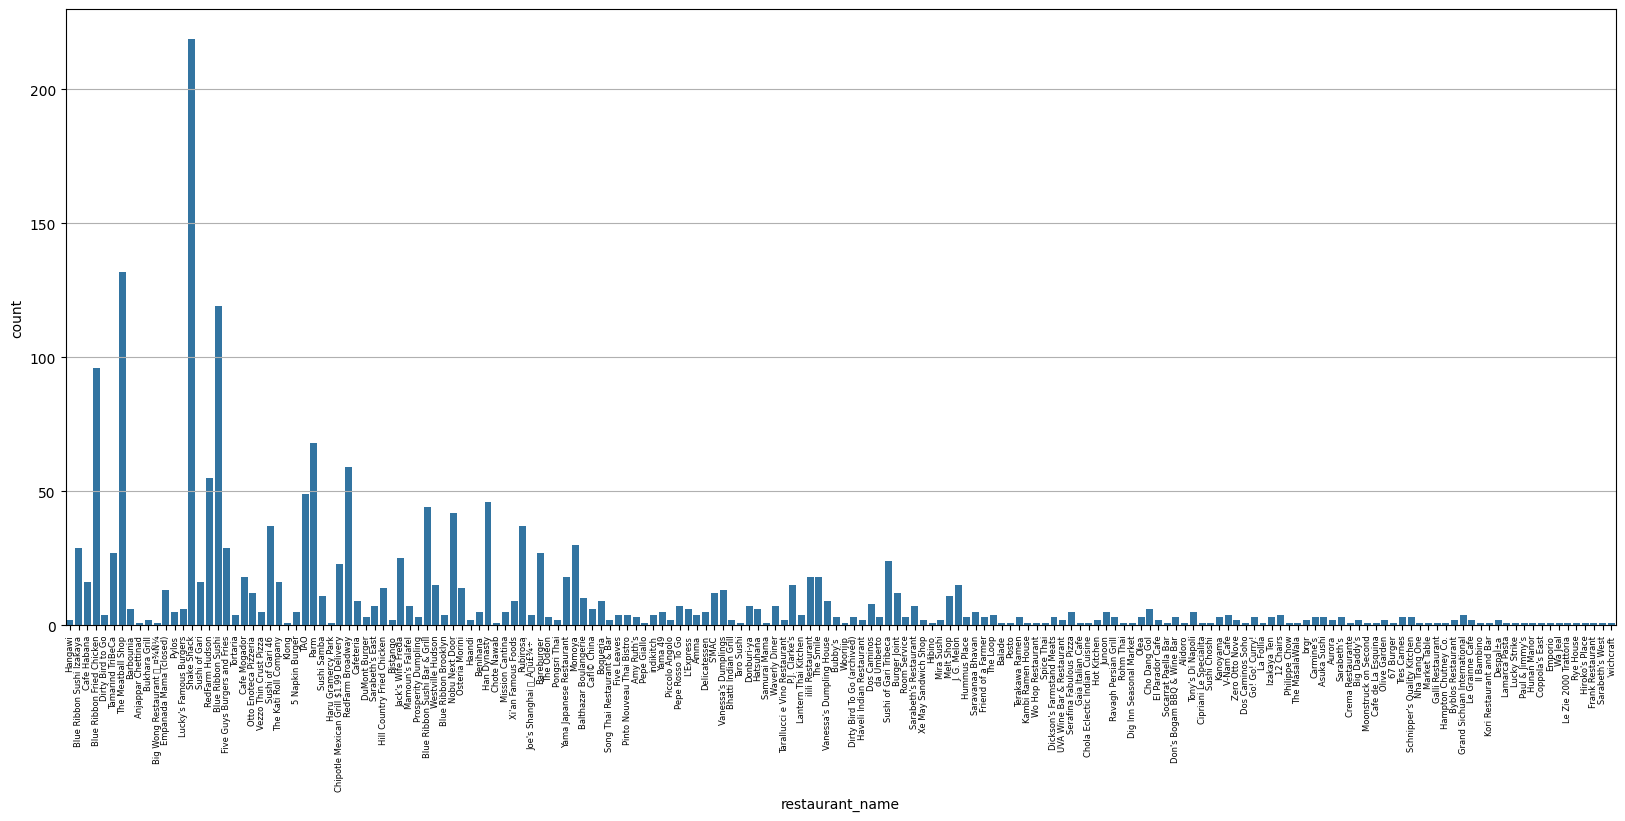

In [188]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'restaurant_name') # Create a countplot for cuisine type
plt.xticks(rotation=90, fontsize = 6)  # Rotate the x-axis labels by 90 degrees and change the font size
plt.grid(axis='y')
plt.show()

**Observations** There are 178 unique restuarants from which customers ordered food through the app.

The countplot shows a large distribution of counts (0~300) for the order of food from different restaurant. The most famous restuarants are Shake Shack (American), The Meatball Shop (American), Blue Ribbon Sushi (Japanese), Blue Ribbon Fried Chicken (American). While there are multiple orders from a handful of restuarants, there are only 1-2 orders from some restaurants also.

**Cuisine Types**

In [189]:
# Check the unique Cuisine Types
print(df['cuisine_type'].nunique())


14


In [190]:
#print(df['cuisine_type'].unique()) #check the name of unique cuisine types
# Get the counts for each cuisine type
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


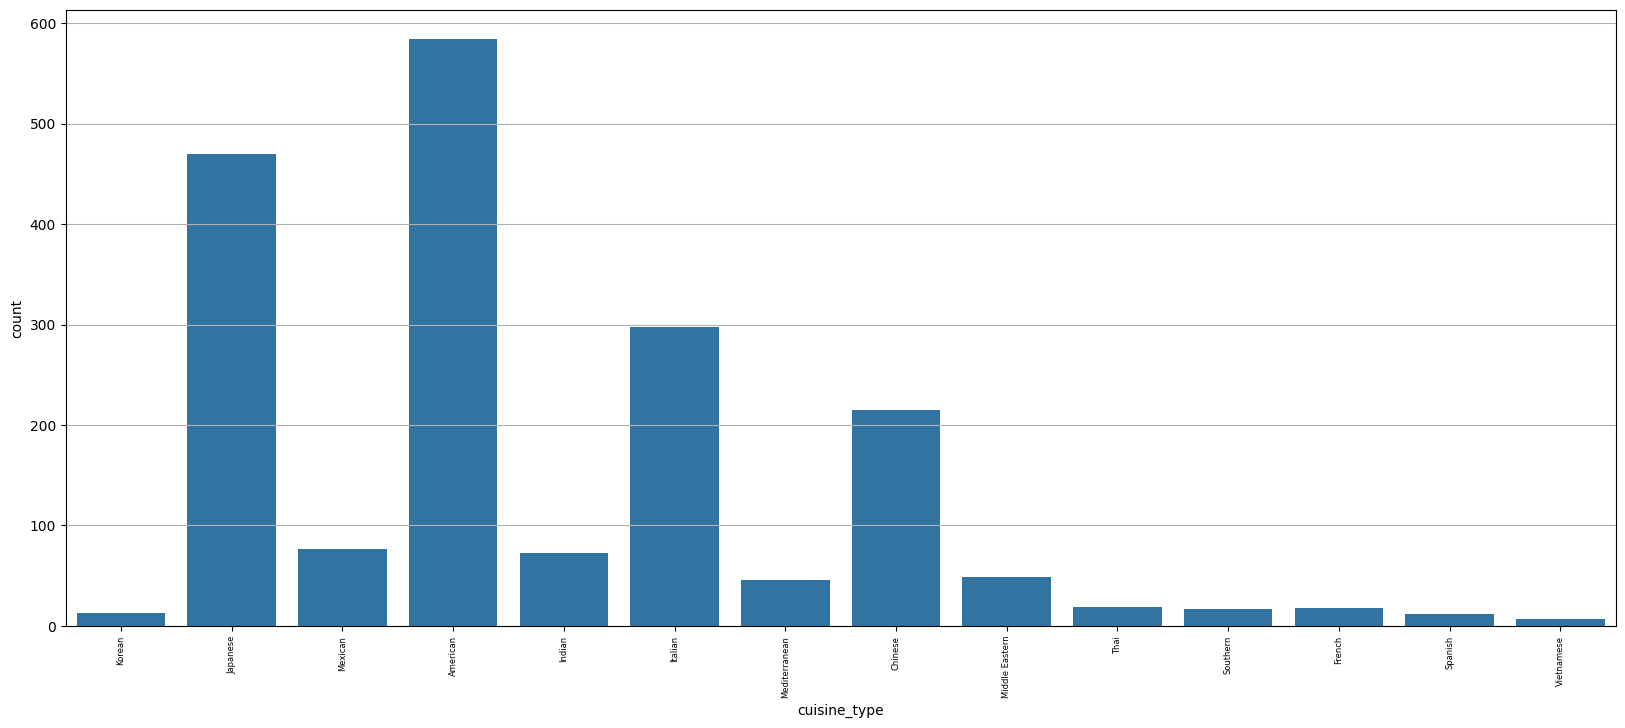

In [191]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type
plt.xticks(rotation=90, fontsize = 6)  # Rotate the x-axis labels by 90 degrees and change the font size
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

**Observations** There are 14 unique types of cuisine from which customers ordered food through the app: 'Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian', 'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern', 'French', 'Spanish', 'Vietnamese'.

The countplot shows a large distribution of counts (0~600) for the order of food of different cuisines. Where American(584), Japanese (470), Italian (298), Chinese (215) are most ordered cuisines with more than 200 orders each, the least ordered are Spanish (12), and Vietnamese (7).

**Day of the week**

In [192]:
# Check the unique days of the week
df['day_of_the_week'].nunique()

2

In [193]:
print(df['day_of_the_week'].unique())
# Get the counts for day_of_the_week
print(df['day_of_the_week'].value_counts())

['Weekend' 'Weekday']
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


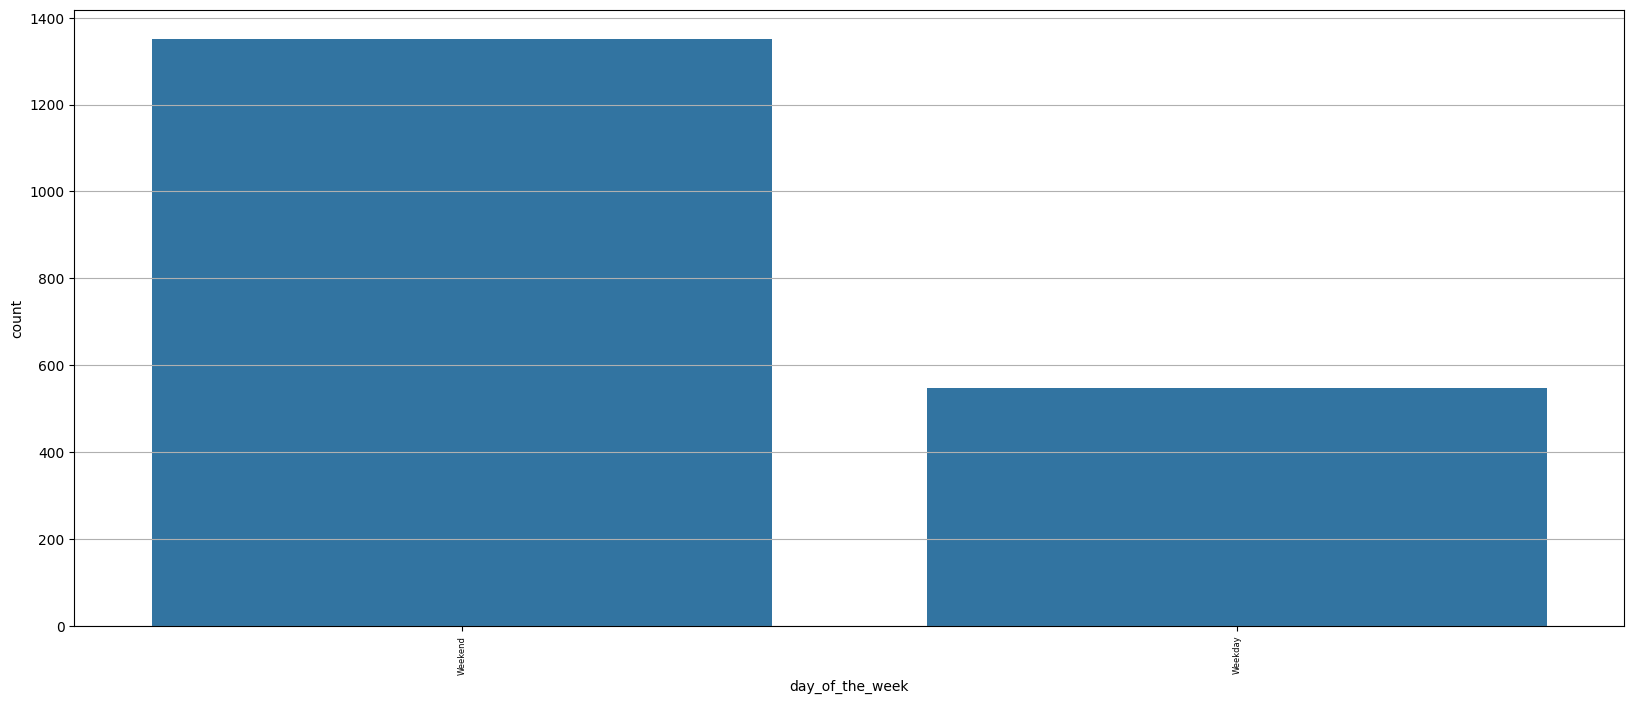

In [194]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'day_of_the_week') # Create a countplot for day of the week
plt.xticks(rotation=90, fontsize = 6)  # Rotate the x-axis labels by 90 degrees and change the font size
plt.grid(axis='y')
plt.show()

**Observations** There are only 2 unique types days of the week : weekday (Monday-Friday) and weekend (Saturday and Sunday).

The countplot shows the orders in the weekends (1351) are more than the weekdays (547).

**Rating**

In [195]:
# Check the unique Ratings
df['rating'].nunique()

4

In [196]:
print(df['rating'].unique())
# Get the counts for rating
print(df['rating'].value_counts())

['Not given' '5' '3' '4']
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


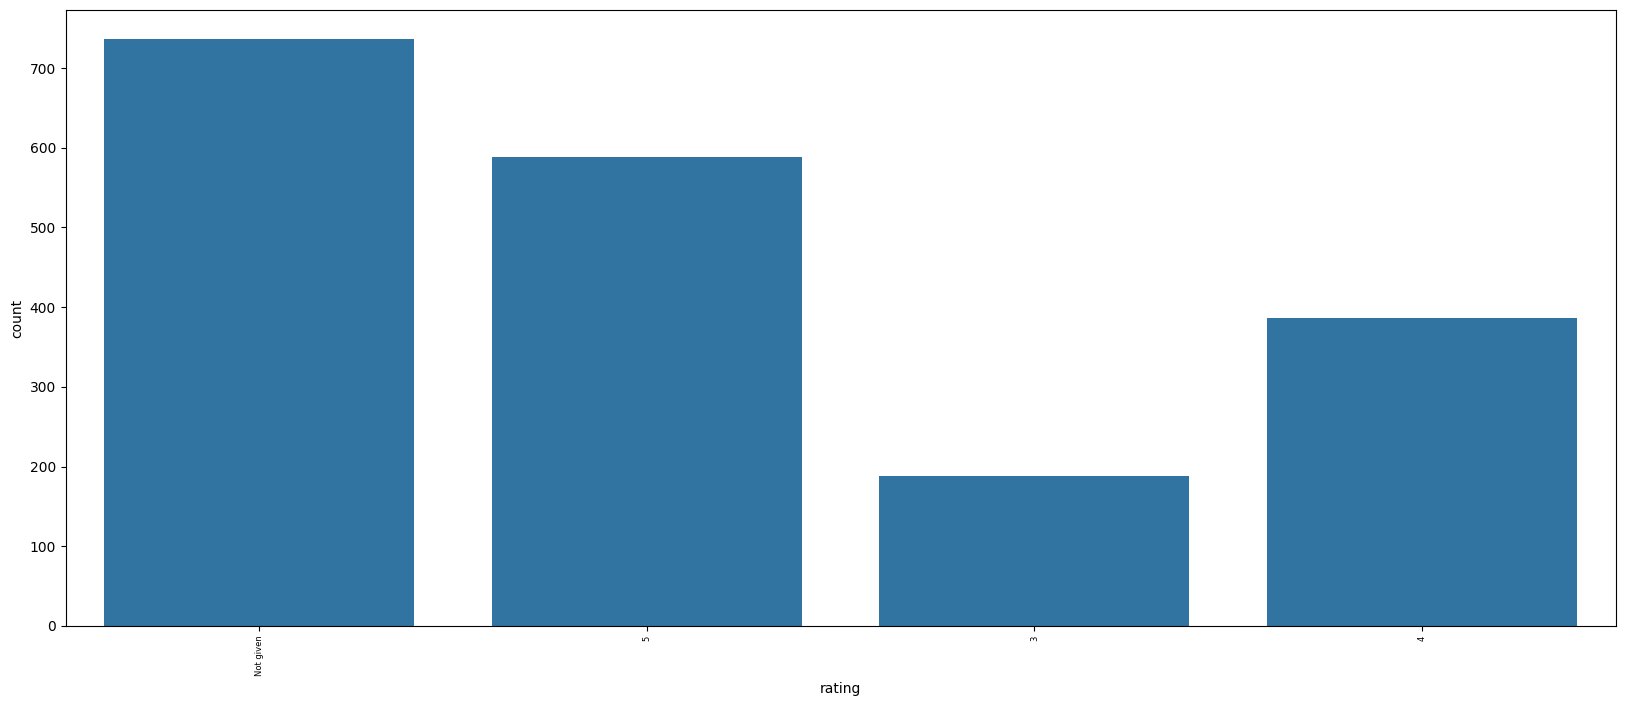

In [197]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'rating') # Create a countplot for cuisine type
plt.xticks(rotation=90, fontsize = 6)  # Rotate the x-axis labels by 90 degrees and change the font size
plt.show()

**Observations** There are only 3 unique types of ratings given: 3,4,5 and and in other cases, no rating was given.

The countplot shows that in most cases, the ratings are not given (736). There are more higher ratings (5: 588 count, 4: 386 count) than low rating (3: 188 count)

# **2. Numerical variables**

**Cost of the order**

In [198]:
# Calculate the mean, median, mode cost of the order
mean_cost = df['cost_of_the_order'].mean()
median_cost = df['cost_of_the_order'].median()
mode_cost = df['cost_of_the_order'].mode()

print(mean_cost,median_cost,mode_cost)

16.498851422550054 14.14 0    12.18
Name: cost_of_the_order, dtype: float64


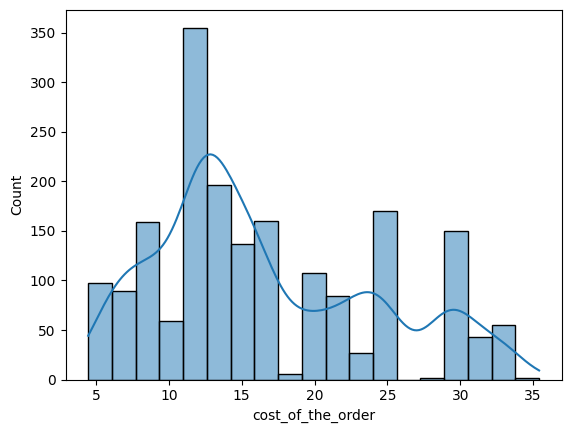

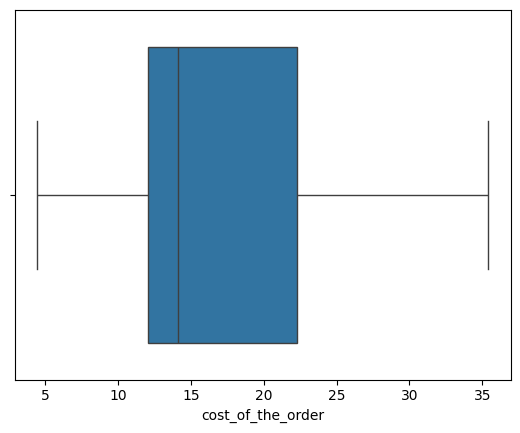

In [199]:
sns.histplot(data=df,x='cost_of_the_order', kde = True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()


**Observation:** The cost of the orders is right skewed, signifying there are more lower cost orders than higher cost orders. The mean of order is 16.5 USD, with comparatively large standard deviation 7.5 USD. The median order is 14.14 USD, and the most frequent occurance of order is 12.18 USD.

**Food preparation time**

In [200]:
# Calculate the mean, median, mode cost of the order
mean_prep_time = df['food_preparation_time'].mean()
std_prep_time = df['food_preparation_time'].std()
median_prep_time = df['food_preparation_time'].median()
mode_prep_time = df['food_preparation_time'].mode()

print(mean_prep_time,std_prep_time,median_prep_time,mode_prep_time)

27.371970495258168 4.6324807759288555 27.0 0    21
Name: food_preparation_time, dtype: int64


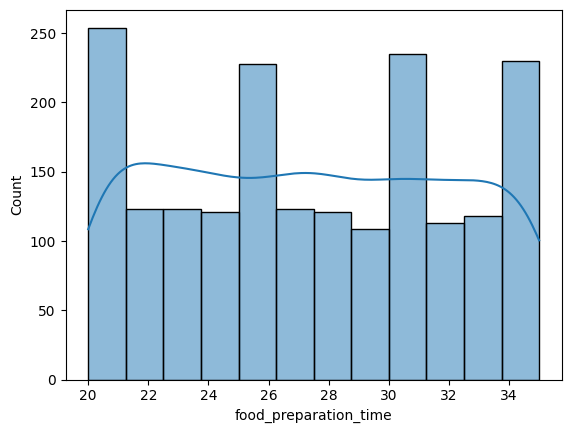

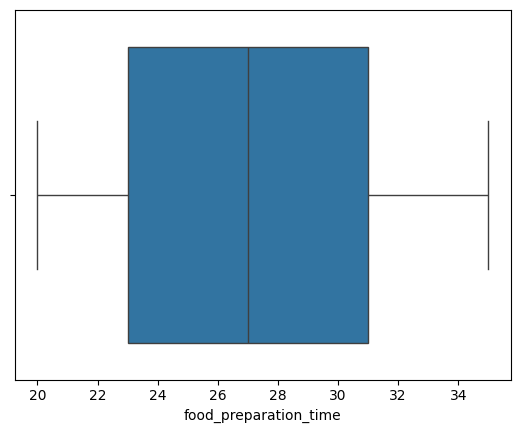

In [201]:
sns.histplot(data=df,x='food_preparation_time', kde = True) ## Histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Boxplot for the food preparation time
plt.show()

**Observation:** The food preparation time has multiple peaks, suggesting that restaurants may have different standard preparation times (20, 25, 30, and 34 minutes) based on the type of food or their operational processes. The food_preparation_time ranges from approximately 20 to 35 minutes, with no times outside this range. The highest peak is around 20 minutes, suggesting that this is the most common preparation time.

**Delivery time**

In [202]:
# Calculate the mean, median, mode cost of the order
mean_delivery_time = df['delivery_time'].mean()
std_delivery_time = df['delivery_time'].std()
median_delivery_time = df['delivery_time'].median()
mode_delivery_time = df['delivery_time'].mode()

print(mean_delivery_time, std_delivery_time, median_delivery_time, mode_delivery_time)

24.161749209694417 4.972636933991106 25.0 0    24
Name: delivery_time, dtype: int64


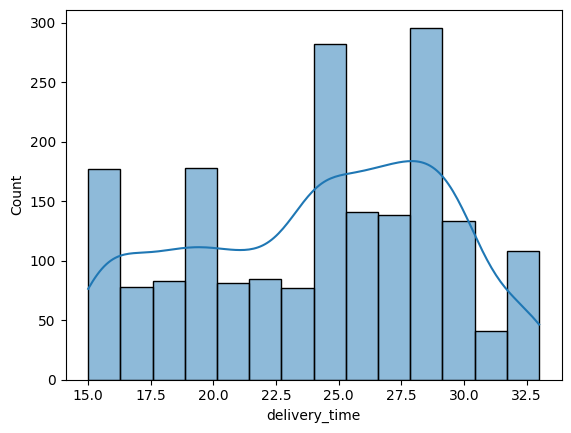

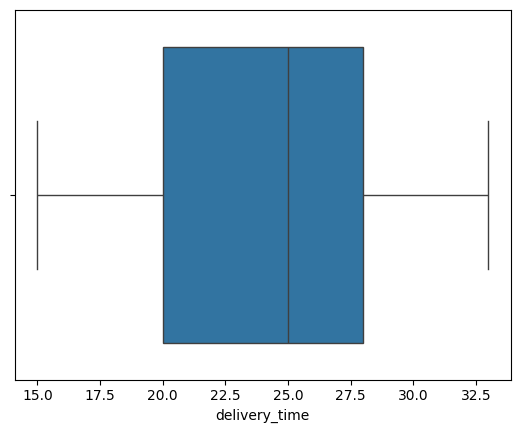

In [203]:
sns.histplot(data=df,x='delivery_time', kde = True) ## Histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Boxplot for the food preparation time
plt.show()

**Observations:** The multiple peaks in the histogram suggest that there are different standard delivery time. The highest peaks around 25 and 27 minutes indicate these are the most common delivery times, which could be due to the optimal routes from restaurants to customers. The average is slightly left skewed, hinting at tendency of more larger delivery times.

# **3. Unique IDs**

**Order IDs**

In [204]:
df['order_id'].nunique()

1898

**Customer IDs**

In [205]:
df['customer_id'].nunique()

1200

In [206]:
print(df['customer_id'].value_counts().head())

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


**Observations:** All the orders have unique ID. There are 1200 unique customers, so some customers have ordered multiple times. The top five customers ordered 13, 10, 9, 8, and 7 times respectively.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [207]:
# The top 5 restaurants
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### **Observations:** The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. The number of orders from them are 219, 132, 119, 96, and 68 respectively.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [208]:
# The most popular cuisine in the weekends

cuisine_type_in_weekend = df[df['day_of_the_week'] == 'Weekend']['cuisine_type']
cuisine_type_in_weekend.value_counts().head(5)

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### **Observations:** The most popular cuisine in the weekend if American, which is ordered 415 times. The other popular weekend cuisines are Japanese (335), Italian (207), Chinese (163), and Mexican (53).


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [209]:
# Write the code here
order_cost_more_than_20 = df[df['cost_of_the_order'] > 20]['order_id']
print('number of orders that cost more than 20 dollars is', order_cost_more_than_20.shape[0])

print('total number of orders is ', df.shape[0])

percentage = order_cost_more_than_20.shape[0] / df.shape[0] * 100

print('percentage of order that costs more than 20 dollars is', round(percentage,2))

number of orders that cost more than 20 dollars is 555
total number of orders is  1898
percentage of order that costs more than 20 dollars is 29.24


#### **Observations:**
number of orders that cost more than 20 dollars is 555

total number of orders is  1898

percentage of order that costs more than 20 dollars is 29.24


### **Question 10**: What is the mean order delivery time? [1 mark]

In [210]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print('The mean order delivery time is', round(mean_delivery_time,2), 'mins')

The mean order delivery time is 24.16 mins


#### **Observations:** The mean order delivery time is 24.16 mins



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [211]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### **Observations:** The customer_ids of top 3 customers are: 52832, 47440, 83287, and the orders from them are 13, 10, and 9 respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Among numerical variables**

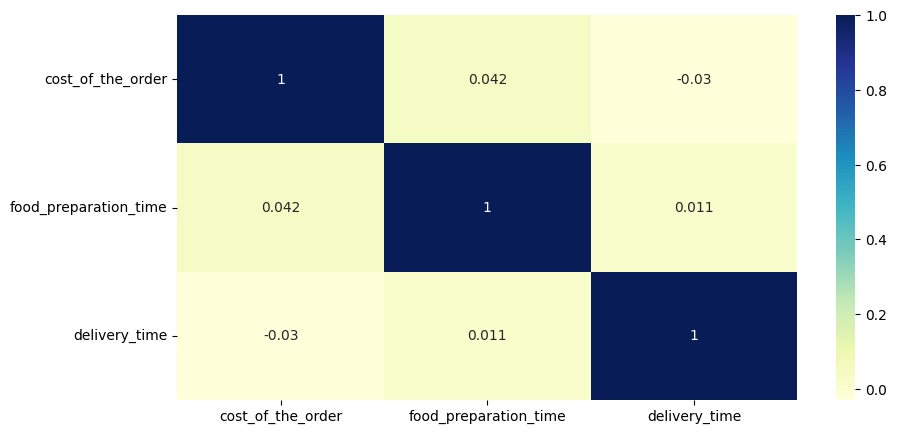

In [212]:
# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='YlGnBu');
plt.show()

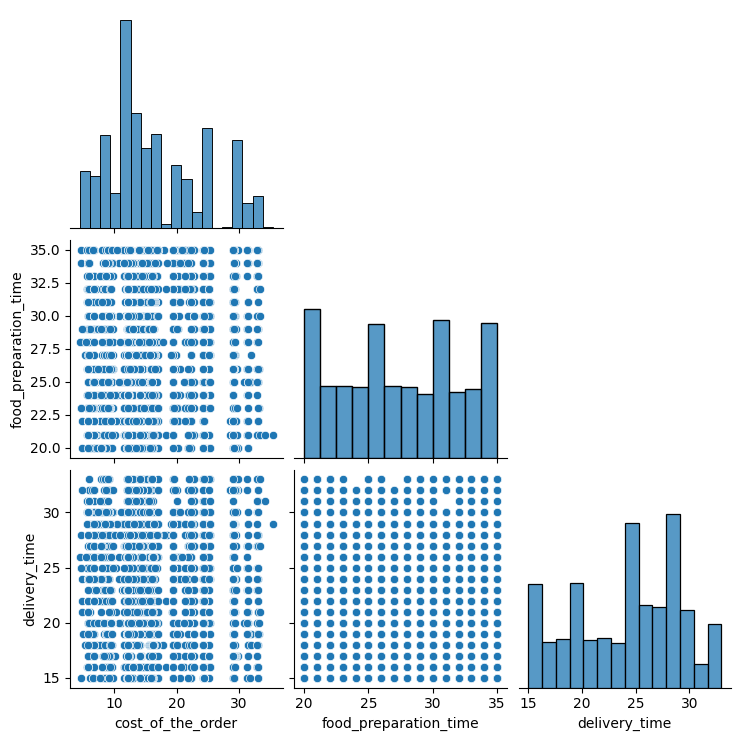

In [213]:
#plot the pair plots for all the numerical variables to further check their relationships
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], corner=True)

**Observations:** From the heatmaps and pairplors, there are no-correlations between the cost of order, food preparation time, and delivery time. That means the expense of the food does not determine the preparation time. It is intuitively understandable that the cost of food is not related to delivery time and the food preparation time is not dependent on delivery time.

**There are too many restuarants, finding relation with cost, prep and delivery time with that is complicated. So, we will focus on cuisine type first categorical variable and explore its relationship with numerical variables.**



**Cuisine Type vs cost of order**


<ipython-input-214-532b5fc637ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette= 'pastel')


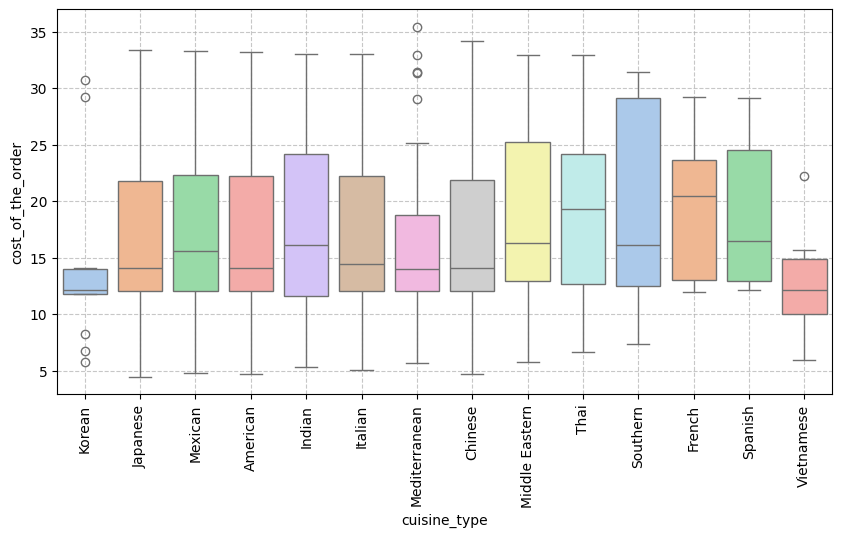

In [214]:
# Make boxplot for cuisine type vs cost of the order
plt.figure(figsize=(10,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations:** Korean Cuisine has a lower cost range compared to other cuisines. The median cost is around 12 USD, few outliers above 15 USD and below 10 USD.

Japanese, Mexican, American, Indian, Italian, and Chinese food costs are relatively higher than Korean. Median costs range from approximately 12-17 USD.

Mediterranean food has lower median cost. Costs range mostly between 10-20 USD, but it has several high outliers above 25 USD.

Middle Eastern, Thai, Southern, French, and Spanish cuisines have a relatively wider cost ranges with higher medians. French cuisine has the highest median, with costs frequently exceeding 20 USD.

Vietnamese cuisine shows a lower median cost, around 12 USD. A smaller range of costs compared to other cuisines.

**Overall**, the box plot illustrates the diversity in order costs among various cuisines, French and Thai cuisine are generally expensive, while Korean and Vietnamese cuisines are generally less expensive.

**Median cost for different cuisine types**

In [215]:
# Median cost of orders for different cuisine types

# Calculate the average cost for each cuisine type
average_costs = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False)

# Display the average costs for the top 10 cuisine types
average_costs.head(20)


,cost_of_the_order
cuisine_type,
French,20.470
Thai,19.350
Spanish,16.520
Middle Eastern,16.300
Indian,16.150
Southern,16.110
Mexican,15.570
Italian,14.480
American,14.120


**Observations:** From the median distribution (which was also evident in the boxplot), the five most expensive cuisines are French, Thai, Spanish, Middle Eastern, Indian and the least expensive five are Chinese, Japanese, Mediterranean, Korean, Vietnamese.

**Cuisine type vs food preparation time**

<ipython-input-216-b18dc728e919>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette= 'pastel')


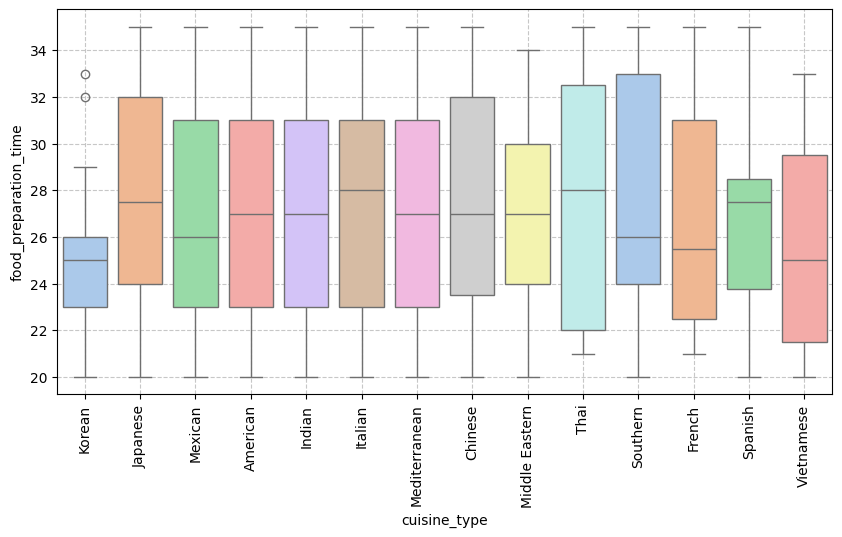

In [216]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations**

Korean Cuisine has a lower median preparation time, around 25 minutes.
Few outliers with higher preparation times, above 30 minutes.

Japanese, Mexican, American, Indian, Italian, Mediterranean, and Chinese cuisines have similar preparation time ranges (Japnese and Chinese having slightly higher ranges) with similar median (Mexican having slightly lower median).


Middle Eastern and Spanish food also have smaller range of preparation times.

Thai, Southern, French, and Vietnamese cuisines have wider ranges of preparation times. Medians range from 25 to 28 minutes. Thai cuisine has a highest median preparation time, around 28 minutes.

**Overall**, the box plot illustrates that while most cuisines have a similar range of preparation times, there are variations within each cuisine. Thai cuisine shows higher preparation times on average, while Korean and cuisines are generally quicker to prepare.


**Cuisine type vs rating**



In [217]:
# Distribution of ratings across different cuisine types

# Filter out rows where the rating is 'Not given'
data_with_ratings = df[df['rating'] != 'Not given'].copy()
data_with_ratings['rating'] = data_with_ratings['rating'].astype(int)

# Calculate the average rating for each cuisine type
average_ratings = data_with_ratings.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

# Display the average ratings for the top 10 cuisine types
average_ratings.head(15)



,rating
cuisine_type,
Spanish,4.833333
Thai,4.666667
Indian,4.540000
Mexican,4.416667
Japanese,4.373626
Italian,4.360465
Chinese,4.338346
Southern,4.307692
French,4.300000


**Observations:** There is a range of ratings for cuisine types. Spanish, Thai, Indian, Mexican, Japanese food tend to have highest ratings while Merican, Middle Eastern, Mediterranean, Korean, Vietnamese foods are lowest rated food.

**Cuisine type vs day of the week**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

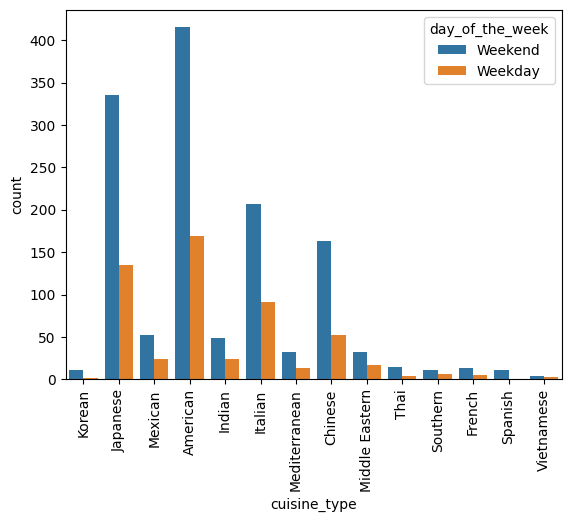

In [218]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation = 90)

In [219]:
# Group by cuisine type and day of the week, then count the number of orders
order_counts = df.groupby(['cuisine_type', 'day_of_the_week']).size().unstack()

#print(order_counts)

weekdays = ['Weekday']
weekends = ['Weekend']

# Sum orders for weekdays and weekends
weekday_counts = order_counts[weekdays].sum(axis=1)
weekend_counts = order_counts[weekends].sum(axis=1)

# Sort the counts in descending order
weekday_popularity = weekday_counts.sort_values(ascending=False)
weekend_popularity = weekend_counts.sort_values(ascending=False)

print("Weekday Popularity:")
print(weekday_popularity)

print("\nWeekend Popularity:")
print(weekend_popularity)


Weekday Popularity:
cuisine_type
American          169
Japanese          135
Italian            91
Chinese            52
Indian             24
Mexican            24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
dtype: int64

Weekend Popularity:
cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
dtype: int64


**Observations:** From the countplot of weekday vs weekend distribution of orders among different cuisine types, it seems the orders are similarly distributed, with the trend of more orders in the weekends than in the weekdays. However, if go to deeper and look into the popularity of the cuisines for weekdays and weekends separately, we observe similar trends for both for the first four most popular cuisines. For the others, they tend to shift a bit (e.g. Indian food is 5th popular in weekdays and 6th popular in the weekends).

**Day of the week vs preparation time**

<ipython-input-220-308e7c6628de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, palette= 'pastel')


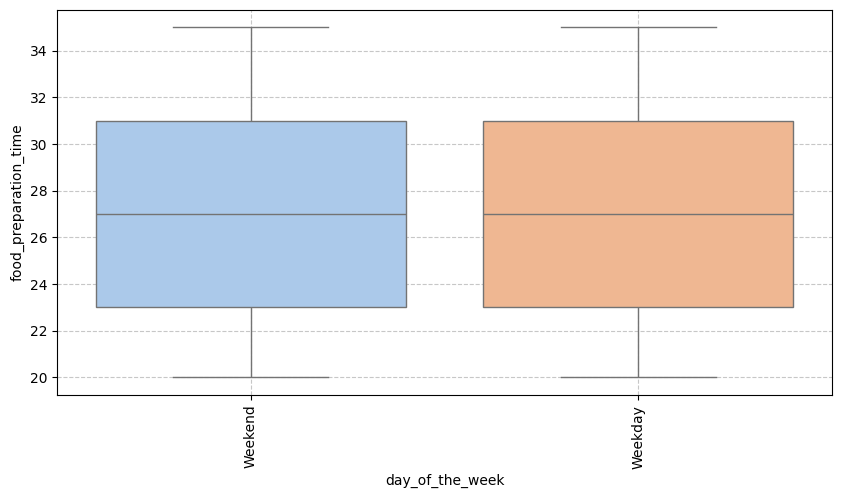

In [220]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(x = "day_of_the_week", y = "food_preparation_time", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations** The food preparation time seems to be same for both weekends and weekdays, which means the order pressure in the weekends does not affect the food preparation time.  

**Day of the week vs food delivery time**

<ipython-input-221-ddba51d4fe33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette= 'pastel')


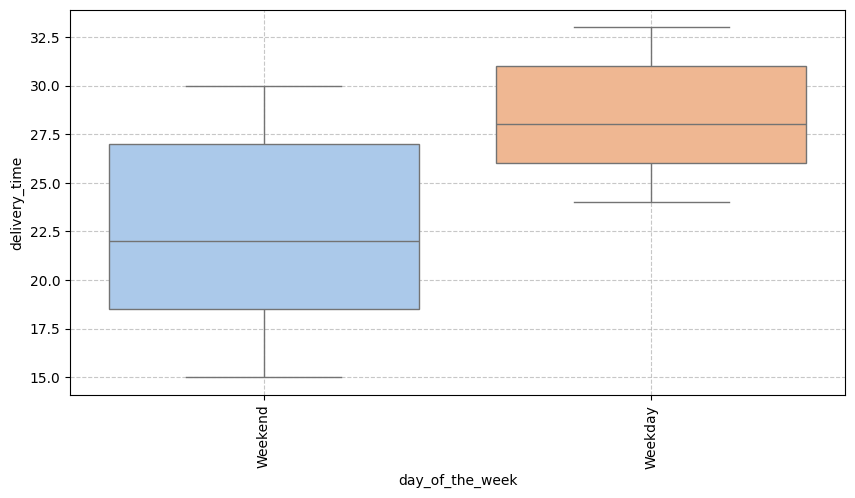

In [221]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations:** From the boxplot, it is clear that in the weekdays, the delivery time is significabtly more than the weekend. The huge traffic from the working people in the weekdays might cause a delay in food delivery in the weekdays.

**Patterns with day of the week and order volume and rating**

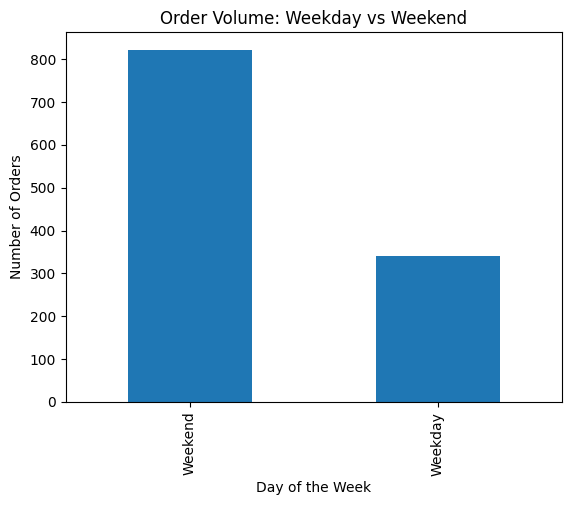

day_of_the_week
Weekday    4.308824
Weekend    4.358881
Name: rating, dtype: float64
day_of_the_week
Weekday    4.0
Weekend    5.0
Name: rating, dtype: float64


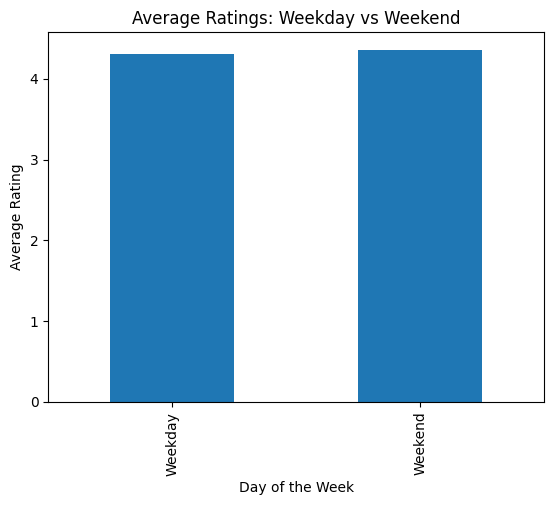

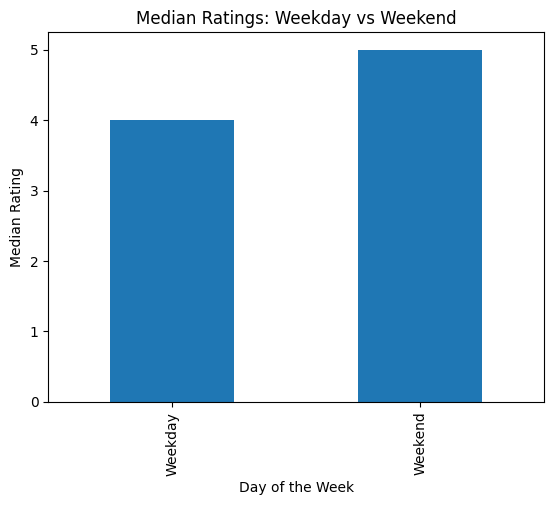

In [222]:
# Calculate the patterns in weekdays and weekends regarding order volume and rating

# Filter out rows where the rating is 'Not given'
data_with_ratings = df[df['rating'] != 'Not given'].copy()
data_with_ratings['rating'] = data_with_ratings['rating'].astype(int)

# Order Volume
order_volume = data_with_ratings['day_of_the_week'].value_counts()
order_volume_weekday = order_volume['Weekday']
order_volume_weekend = order_volume['Weekend']

# Plot Order Volume
order_volume.plot(kind='bar')
plt.title('Order Volume: Weekday vs Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# Average Ratings
average_ratings = data_with_ratings.groupby('day_of_the_week')['rating'].mean()
median_ratings = data_with_ratings.groupby('day_of_the_week')['rating'].median()

print(average_ratings)
print(median_ratings)

average_ratings_weekday = average_ratings['Weekday']
average_ratings_weekend = average_ratings['Weekend']

# Plot Average Ratings
average_ratings.plot(kind='bar')
plt.title('Average Ratings: Weekday vs Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.show()



# Plot median Ratings
median_ratings.plot(kind='bar')
plt.title('Median Ratings: Weekday vs Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Median Rating')
plt.show()



**Observations:** Though the number of orders are significantly higher in the weekends than the weekdays, the average ratings are quite similar for both. However, if we plot the median rating for weekdays and weekends, we observe a drop of rating in the weekdays, this could be due to the higher delivery time in the weekdays.

**Rating vs food preparation time**

<ipython-input-223-5b59d7e22fb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette= 'pastel')


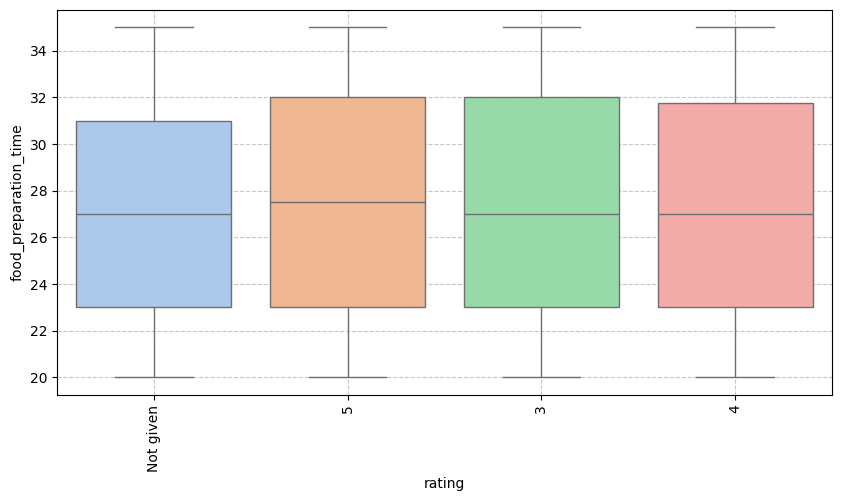

In [223]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations:** The ratings are similarly distributed for different food preparation times. So, the ratings are not dependent on the food preparation time. However, the 5 rated food tends to have a higher median preparation time, increasing the qualirt of the food.  

**Rating vs delivery time**

<ipython-input-224-78d9513fb03e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "rating", y = "delivery_time", data = df, palette= 'pastel')


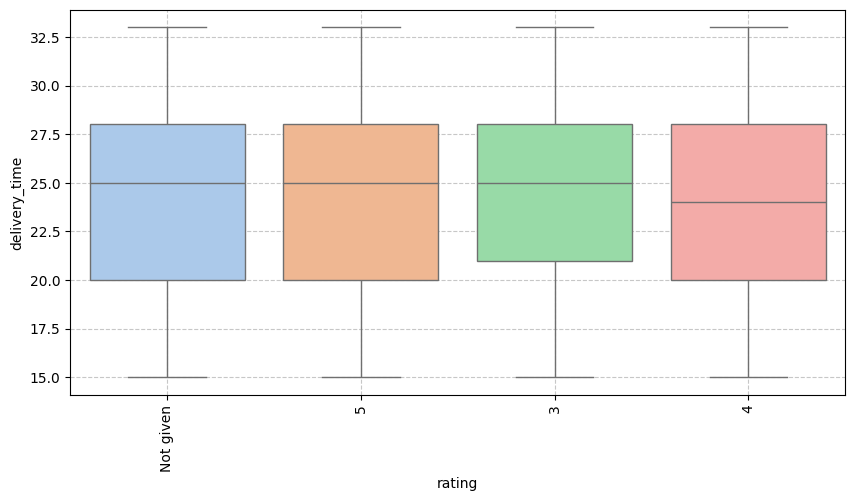

In [224]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(x = "rating", y = "delivery_time", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations:** Ratings do not seem to be related with the delivery time as for all of the ratings, the delivery times have similar distributions. However, 4 rated food has slightly less median, which is not that meaningful in this case.

---



**Relation between total delivery time and rating**

In [225]:
# Calculate the total delivery time
#start with data_with_ratings = df[df['rating'] != 'Not given'].copy()

data_with_ratings['total_delivery_time'] = data_with_ratings['food_preparation_time'] + data_with_ratings['delivery_time']

# Summary Statistics for Total Delivery Time, divide the total delivery time in 5 bins and calculate mean, median and number of orders/ count
total_time_summary = data_with_ratings.groupby(pd.cut(data_with_ratings['total_delivery_time'], bins=5))['rating'].agg(['mean', 'median', 'count']).reset_index()
total_time_summary.columns = ['Total Delivery Time', 'Mean Rating', 'Median Rating', 'Order Count']

total_time_summary


<ipython-input-225-dac6df772c35>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_time_summary = data_with_ratings.groupby(pd.cut(data_with_ratings['total_delivery_time'], bins=5))['rating'].agg(['mean', 'median', 'count']).reset_index()


,Total Delivery Time,Mean Rating,Median Rating,Order Count
0,"(34.967, 41.6]",4.451613,5.0,93
1,"(41.6, 48.2]",4.331058,4.0,293
2,"(48.2, 54.8]",4.329870,4.0,385
3,"(54.8, 61.4]",4.323333,5.0,300
4,"(61.4, 68.0]",4.406593,5.0,91


**Observations:** If we go deeper into the total food preparation and delivery time and its relation with ratings and calculate the relation between total food delivery time vs rating, we see no correlation between two. We have calculated the total delivery time and divided that in 5 bins and calculated mean and median for each bin. We see no monotonic increase or decrease pattern of rating for change in total delivery time.

**Rating vs cost of the order**

<ipython-input-226-52895f957111>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "rating", y = "cost_of_the_order", data = df, palette= 'pastel')


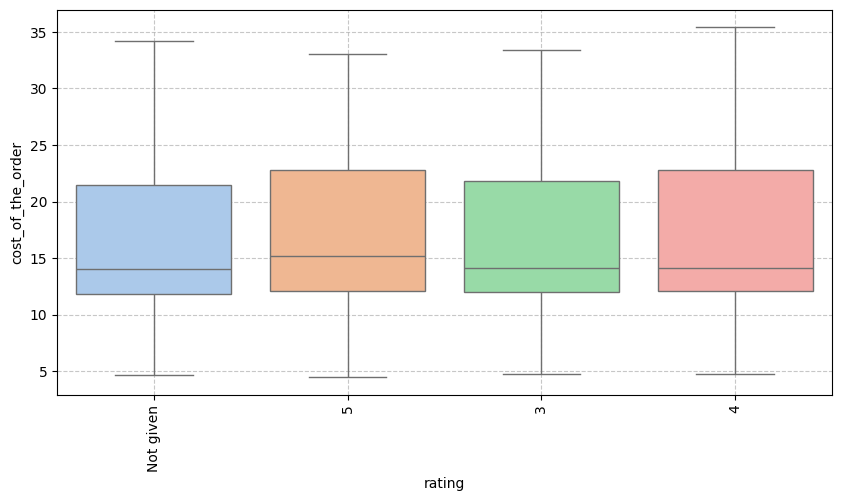

In [226]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(x = "rating", y = "cost_of_the_order", data = df, palette= 'pastel')
plt.xticks(rotation = 90)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Observations:** The cost of the orders are similarly distributed across different ratings. However, the highest rated (5) food tend to have slightly higher median cose and distribution range. That means more expensive food tend to retain the quality, and hence results customer satisfaction.

**Revenue generated by restuarants**

In [227]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


**Observations:** Here are the top 14 restuarants that could have most revenue through the FoodHub app. The 5 most profited restuarants are also the 5 most popular restuarants.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [228]:
# Data with ratings: as previously defined data_with_ratings = df[df['rating'] != 'Not given'].copy()
#data_with_ratings['rating']= data_with_ratings['rating'].astype(int)

# Calculate the rating count and average rating for each restaurant
restaurant_ratings = data_with_ratings.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

#print(restaurant_ratings)

# Filter restaurants with rating count > 50 and average rating > 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the restaurants fulfilling the criteria
print(eligible_restaurants)


                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations: The restaurants with both rating count of more than 50 and the average rating greater than 4 are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop. These are eligible for the promotional offers in the advertisements of the restaurants.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [229]:
# Define the function to calculate the revenue based on the cost of the order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to the 'cost_of_the_order' column to calculate revenue for each order
revenue = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total net revenue
total_revenue = revenue.sum()
total_revenue

6166.303

#### Observations: By considering the criteria, 25% on the orders having cost greater than 20 USD and 15% on the orders having cost greater than 5 USD, the revenue generated by the company accross all orders is: 6166.30 USD.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [230]:
# Calculate the total time required to deliver the food for each order
total_delivery_time= df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
total_orders = len(df) #size of total orders
orders_over_60_min = len(df[total_delivery_time > 60]) #size of orders taking delivery time greater than 60 mins
percentage_over_60_min = (orders_over_60_min / total_orders) * 100 # (orders taking delivery time greater than 60 mins/ total number of orders) X 100%
print(percentage_over_60_min)



10.537407797681771


#### Observations:  The orders that take delivery time more than 60 mins are 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [231]:
# Group the data by 'day_of_the_week' and calculate the mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
#print(mean_delivery_time)

mean_delivery_time_weekday = mean_delivery_time['Weekday']
mean_delivery_time_weekend = mean_delivery_time['Weekend']

mean_delivery_time_weekday, mean_delivery_time_weekend

(28.340036563071298, 22.4700222057735)

#### Observations: The mean delivery time in the weekdays is 28.34 mins and in the weekend is 22.46 mins. Thus, it seems that in weekdays the average delivery time is more, probably because of busier traffic situation.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

**All these results are mostly based on the univariate and multi-variate analysis that is done in Question x and 12.**
### Conclusions:


1.   Cuisine based :

* In terms of order of popularity of cuisines American, Japanese, Italian, Chinese, Mexican cuisines seem to be most popular with more than 200 orders for the first four. The least popular cuisines are French, Southern, Korean, Spanish, and Vietnamese, each with less than 20 orders.

* There are 3 main types of cuisine costwise: 1) least expensive cuisines: Korean and Vietnamese cuisines (around 12 USD), 2) moderately expensive cuisines: Japanese, Mexican, American, Indian, Italian, and Chinese cuisines have median costs ranging from 12-17 USD, 3) most expensive cuisines: French and Thai cuisines (exceeding 20 USD).

* Preparation time wise: 1) quickest to prepare: Korean cuisine has the lowest median preparation time of around 25 minutes. 2)average preparation time: Japanese, Mexican, American, Indian, Italian, Mediterranean, and Chinese cuisines have similar preparation times. 3) longest to prepare: Thai cuisine has the highest median preparation time, around 28 minutes.

* Customer rating wise: 1) highest ratings: Spanish, Thai, Indian, Mexican, and Japanese cuisines tend to receive the highest ratings. 2) lowest ratings: American, Middle Eastern, Mediterranean, Korean, and Vietnamese cuisines receive lower ratings.

* Among the most popular cuisines, e.g. American, the rating is among the lower end which if improved with customer feedback, the business will definitely improve. For each of the cuisines, we can analyse in detail where the room for improvement is and focus on the particular areas accordingly. For example, Thai food tends to take longer preparation time, but rating is good while for Korean food the cost and preparation time is less but the rating is not great.

2.   Rating based :

* Food preparation time: Consistent across both weekends and weekdays, indicating that order pressure on weekends does not affect preparation time.

* Delivery time: Significantly longer on weekdays compared to weekends, likely due to increased traffic during weekdays.

* Order volume and ratings: Higher number of orders on weekends with similar average ratings for both weekdays and weekends. Median rating drops on weekdays, potentially due to longer delivery times.

* Ratings vs. preparation time: Ratings are independent of preparation time, but 5-rated food has a higher median preparation time, suggesting better quality.

* Ratings vs. delivery time: No significant correlation between ratings and delivery time, though 4-rated food has a slightly lower median delivery time.

* Total delivery time vs. ratings: No correlation between total delivery time and ratings, with no consistent pattern observed.

* Cost vs. ratings: Higher-rated (5) food tends to have a slightly higher median cost and distribution range, indicating that more expensive food generally results in higher customer satisfaction.

3. Day of the week (weekday or weekend) based:

* Food preparation time: Consistent across both weekends and weekdays, indicating no impact from weekend order pressure.

* Delivery time: Significantly longer on weekdays, likely due to increased traffic from working people.

* Order volume and ratings: More orders on weekends compared to weekdays.
Similar average ratings for both, but median ratings drop on weekdays, potentially due to longer delivery times.

* Weekend advantage: Weekends see more orders, shorter delivery times, consistent preparation times, and better ratings overall.






### Recommendations:

1. Cuisine based:

* Promotions for high-rated cuisines: Increase visibility and offer
 promotions for high-rated cuisines like Spanish, Thai, Indian, Mexican, and Japanese to increase customer satisfaction and repeat orders.

* Cost-effective options: Highlight and promote cost-effective cuisines such as Korean and Vietnamese for the interest of price-sensitive customers. Try to find the reason behinf lower ratings of those from customer reviews and implement those.

* Optimize preparation times: Work with restaurants, particularly those serving Thai cuisine which has among highest ratings, to reduce wait times.

* Weekend offers: Since in weekends, the order volumes are significantly more, try to increase the sale by offering special weekend promotions or discounts.

* Orders above $20 contribute significantly to the revenue (25%). Prioritize these high-value orders for quicker delivery and better service to maintain customer satisfaction.

* Customer feedback: Collect and analyze detailed customer feedback for lower-rated cuisines (American, Middle Eastern, Mediterranean, Korean, Vietnamese) to identify areas for improvement. Since American cuisine is most popular, the quality improvement will definitely result more sale. Consider offering incentives for providing ratings, such as discount coupons or loyalty points.

2. Rating based:

* Traffic management: Implement strategies to manage delivery times during weekdays, possibly by changing or optimizing delivery routes or increasing the number of delivery people.

* Quality emphasis: Encourage restaurants to maintain high food quality, as indicated by the higher ratings for foods with longer preparation times and higher costs.

* Customer feedback: Collect detailed feedback on weekdays to address any issues leading to the drop in median ratings. Moreover, encourage all the customers to rate the food as there are a significant number of customers that are not rating yet.

* Premium options: Highlight premium, higher-cost food options (e.g. Thai cuisine) that tend to have higher ratings to attract customers looking for quality.

3. Day of the week (weekday or weekend) based:

* Reduce the delivery time in the weekdays using the strategies as mentioned in previous points (optimizing delivery routes, increasing number of delivery people). As the food preparation time and cost are same for both weekend and weekdays, the shorter delivery time will definitely help improving the weekday ratings as well.

* Since the ratings are dropped in the weekdays, having occasional offers in the weekdays will also attract the customers. Gather and analyze detailed feedback to address issues leading to lower median ratings on weekdays.

* Provide regular training for delivery personnel on the most efficient routes and customer service best practices.


---